INFO:tensorflow:Restoring parameters from /home/src/goodsdl/train/79/model.ckpt-68188


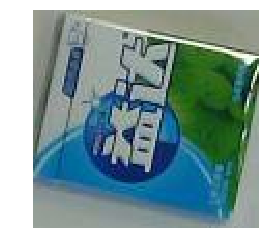

Probability 19.31% => [153]
Probability 15.62% => [95]
Probability 9.46% => [31]
Probability 5.12% => [135]
Probability 4.90% => [68]


In [6]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from datasets import imagenet
from nets import inception
from preprocessing import inception_preprocessing

from tensorflow.contrib import slim

image_size = inception.inception_resnet_v2.default_image_size
checkpoints_dir = '/home/src/goodsdl/train/79'
#image_path = '/home/src/goodsdl/train/79/step2/6901668002426/172000.404613_train_1.jpg'
image_path = '/home/src/goodsdl/train/79/step2/69029097/141859.887314_train_1.jpg'

with tf.Graph().as_default():
    image_string = tf.read_file(image_path)
    image = tf.image.decode_jpeg(image_string, channels=3)
    processed_image = inception_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
    processed_images  = tf.expand_dims(processed_image, 0)
    
    # Create the model, use the default arg scope to configure the batch norm parameters.
    with slim.arg_scope(inception.inception_resnet_v2_arg_scope()):
        logits, _ = inception.inception_resnet_v2(processed_images, num_classes=157, is_training=False)
    probabilities = tf.nn.softmax(logits)
    
    init_fn = slim.assign_from_checkpoint_fn(
        tf.train.latest_checkpoint(checkpoints_dir),
        slim.get_model_variables('InceptionResnetV2'))
    
    with tf.Session() as sess:
        init_fn(sess)
        np_image, probabilities = sess.run([image, probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]
        
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.axis('off')
    plt.show()

    for i in range(5):
        index = sorted_inds[i]
        print('Probability %0.2f%% => [%s]' % (probabilities[index] * 100, index))

In [4]:
print(probabilities)

[  1.42627920e-03   1.69096771e-03   1.79341077e-04   2.69821868e-03
   2.04604957e-03   1.16485870e-04   1.36506176e-04   2.66929623e-04
   1.47365019e-04   3.03880370e-04   1.26607891e-03   3.12301090e-05
   8.07697725e-05   8.65172505e-01   6.01595966e-04   1.34962407e-04
   8.84521566e-03   4.06320393e-03   8.45302420e-04   2.48713815e-03
   2.12004852e-05   1.93577388e-03   2.49563833e-04   3.41227336e-04
   5.19368099e-04   7.86854187e-04   7.25946680e-04   7.89685218e-05
   1.04791950e-04   2.81625631e-04   3.08337301e-04   4.77101246e-04
   4.25496197e-04   7.45960395e-04   9.92484347e-05   3.01753316e-04
   5.38702996e-04   1.73154916e-03   3.09085404e-03   9.00103943e-04
   7.68788086e-05   3.96454183e-04   3.34594515e-04   3.34628654e-04
   6.18675040e-06   1.27522671e-03   2.60003866e-03   2.57169246e-04
   2.63543159e-04   4.12339927e-04   3.66890541e-04   4.13484260e-04
   5.40733337e-04   1.50755479e-03   2.08776956e-03   7.56268782e-05
   8.31215642e-04   5.34994528e-04

In [5]:
print(sorted_inds)

[13, 117, 16, 68, 67, 69, 17, 153, 38, 134, 3, 46, 19, 54, 4, 21, 119, 37, 1, 106, 65, 78, 53, 0, 45, 95, 10, 114, 84, 155, 101, 85, 77, 39, 140, 18, 56, 25, 75, 72, 33, 71, 26, 130, 103, 124, 60, 129, 136, 100, 135, 73, 14, 150, 108, 93, 70, 89, 52, 145, 81, 36, 57, 83, 90, 86, 61, 24, 118, 131, 97, 109, 31, 32, 102, 51, 49, 41, 50, 99, 113, 23, 66, 43, 42, 156, 87, 88, 142, 30, 9, 35, 82, 29, 154, 7, 48, 47, 139, 152, 132, 105, 115, 22, 122, 92, 94, 91, 148, 79, 137, 123, 98, 59, 120, 121, 2, 112, 76, 74, 116, 133, 149, 146, 107, 8, 6, 128, 15, 5, 96, 104, 28, 111, 62, 34, 144, 127, 138, 12, 27, 151, 126, 40, 55, 63, 110, 64, 143, 147, 58, 125, 80, 141, 11, 20, 44]
